# Visualização de Dados

In [1]:
import pandas as pd

In [3]:
#Leitura dos arquivos
df1 = pd.read_excel('../datasets/Aracaju.xlsx')
df2 = pd.read_excel('../datasets/Fortaleza.xlsx')
df3 = pd.read_excel('../datasets/Natal.xlsx')
df4 = pd.read_excel('../datasets/Recife.xlsx')
df5 = pd.read_excel('../datasets/Salvador.xlsx')


In [4]:
df = pd.concat([df1,df2,df3,df4,df5])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [6]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [7]:
df['LojaID'] = df['LojaID'].astype('object')

In [8]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [10]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

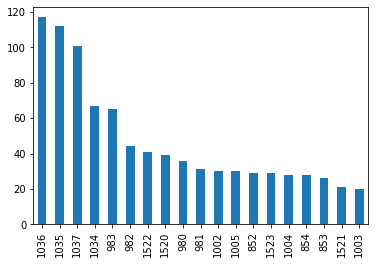

In [12]:
#Gráfico de Barras 
df['LojaID'].value_counts(ascending=False).plot.bar()

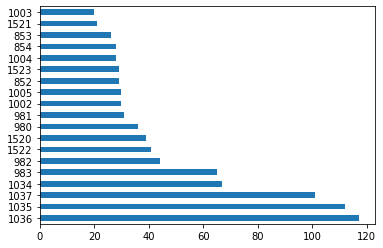

In [15]:
#Gráfico de barras Horizontais
df['LojaID'].value_counts().plot.barh();

<AxesSubplot:>

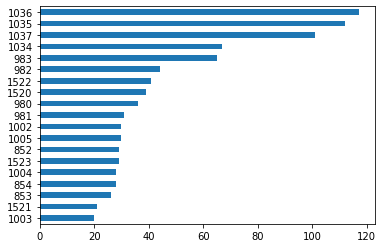

In [16]:
#Gráfico de Barras horizontais ordenado
df['LojaID'].value_counts(ascending=True).plot.barh()

<AxesSubplot:ylabel='Receita'>

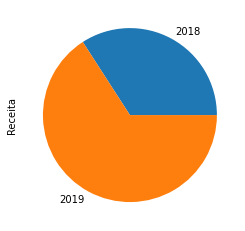

In [17]:
#Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [19]:
#Total vendas por cidades
df['Cidade'].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

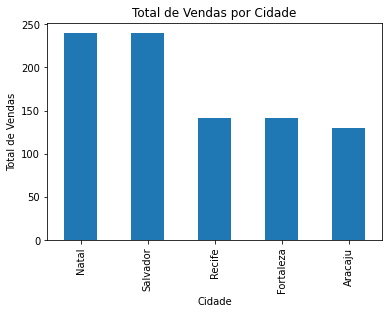

In [21]:
#Adicionando um titulo e alternando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

Text(0, 0.5, 'Total de vendas')

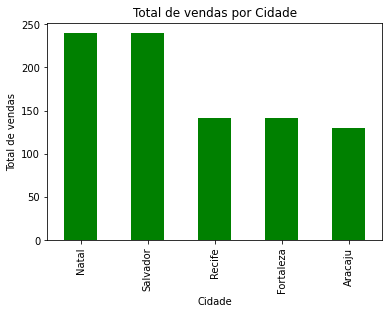

In [22]:
#Alterando a cor do gráfico 
df['Cidade'].value_counts().plot.bar(title='Total de vendas por Cidade',color='green')
plt.xlabel('Cidade')
plt.ylabel('Total de vendas')

In [23]:
#alterando o estilo
plt.style.use('ggplot')

In [27]:
#Extraindo o mês e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month,df['Data'].dt.day)

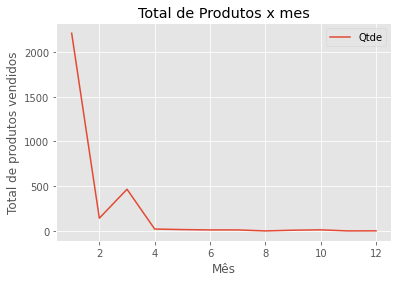

In [29]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total de Produtos x mes')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend()

In [30]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [31]:
df['Ano_venda'] = df['Data'].dt.year

In [36]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_venda'] == 2019]

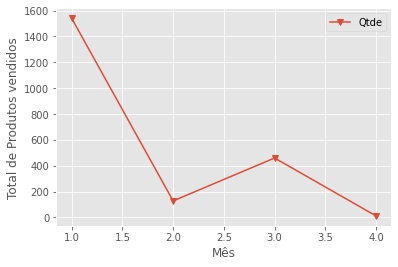

In [38]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos vendidos')
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

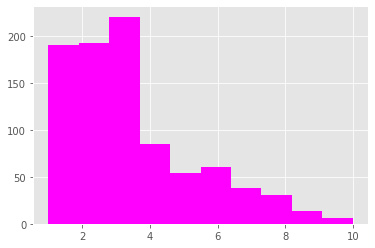

In [39]:
#Histograma
plt.hist(df['Qtde'],color='magenta')

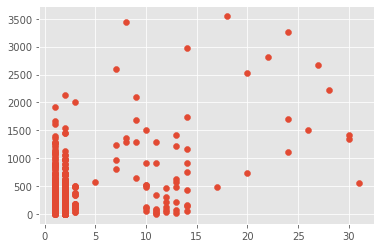

In [40]:
plt.scatter(x=df_2019['dia_venda'],y=df_2019['Receita'])

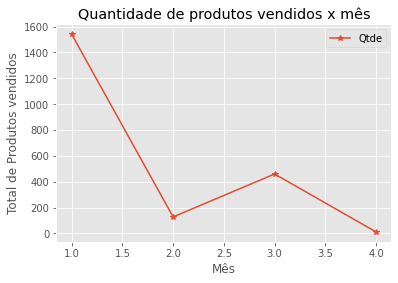

In [42]:
#Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='*')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos vendidos')
plt.legend()
plt.savefig('GraficoQteXMes.png')